In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = "C:/archive/animals/animals"

In [3]:
categories = os.listdir(dataset)
print(categories)

['cats', 'dogs', 'panda']


In [4]:
train_data = []

for c in categories:
    path = os.path.join(dataset, c)
    label = categories.index(c)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (32, 32))
        train_data.append((img_arr, label))

print(len(train_data))

3000


In [5]:
X = [features for features, label in train_data]
y = [label for features, label in train_data]

X = np.array(X).reshape(len(X), -1)
y = np.array(y)

In [6]:
k_values = range(1, 21)

In [7]:
avg_accuracy_l1 = []
avg_accuracy_l2 = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    scores_l1 = cross_val_score(knn_l1, X, y, cv=kf, scoring='accuracy')
    avg_accuracy_l1.append(np.mean(scores_l1))
    
    scores_l2 = cross_val_score(knn_l2, X, y, cv=kf, scoring='accuracy')
    avg_accuracy_l2.append(np.mean(scores_l2))

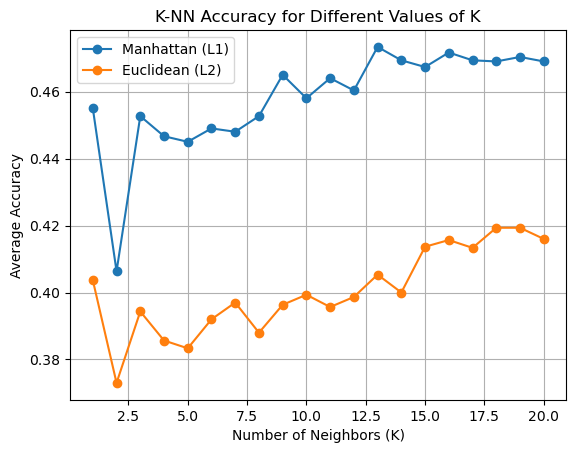

In [8]:
plt.plot(k_values, avg_accuracy_l1, label='Manhattan (L1)', marker='o')
plt.plot(k_values, avg_accuracy_l2, label='Euclidean (L2)', marker='o')

plt.title('K-NN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
best_k_l1 = k_values[np.argmax(avg_accuracy_l1)]
best_accuracy_l1 = np.max(avg_accuracy_l1)

best_k_l2 = k_values[np.argmax(avg_accuracy_l2)]
best_accuracy_l2 = np.max(avg_accuracy_l2)

if best_accuracy_l1 > best_accuracy_l2:
    best_k = best_k_l1
    best_metric = 'manhattan'
    best_accuracy = best_accuracy_l1
else:
    best_k = best_k_l2
    best_metric = 'euclidean'
    best_accuracy = best_accuracy_l2

print(f"Best K: {best_k}")
print(f"Best Metric: {best_metric}")
print(f"Best Accuracy: {best_accuracy}")

Best K: 13
Best Metric: manhattan
Best Accuracy: 0.47333333333333333


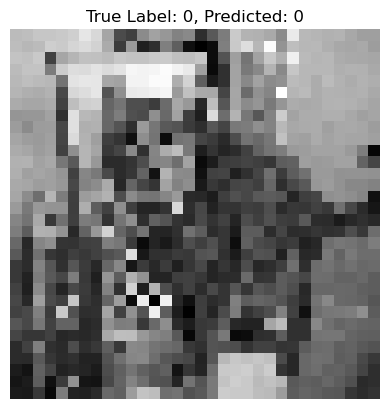

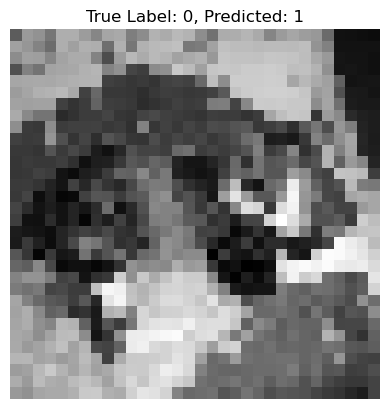

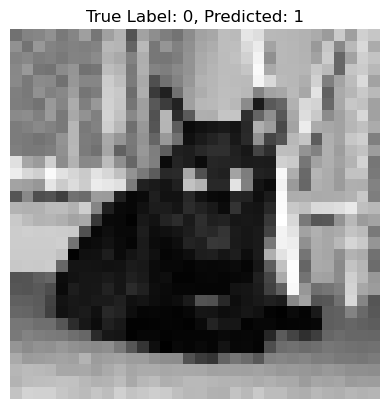

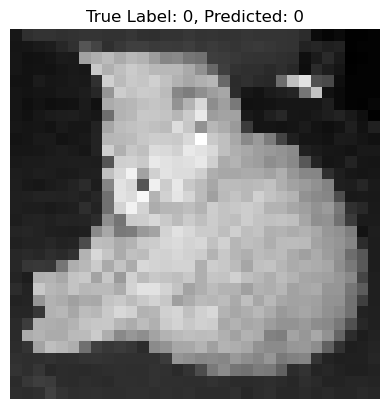

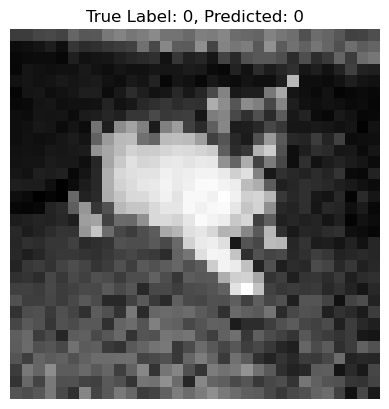

In [10]:
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X, y)

predictions = knn.predict(X)

top_5_indices = range(5) 
top_5_predictions = predictions[top_5_indices]
top_5_true_labels = y[top_5_indices]

for i in top_5_indices:
    plt.imshow(X[i].reshape(32, 32), cmap='gray')
    plt.title(f"True Label: {top_5_true_labels[i]}, Predicted: {top_5_predictions[i]}")
    plt.axis('off')
    plt.show()

In [11]:
# Code Description

"""
In the code, firstly, the necessary libraries are imported. The `os` module manages directory and path operations, while `cv2`
(OpenCV) handles image reading and resizing. `numpy` is used for numerical operations and array handling, and `matplotlib.pyplot`
for plotting and data visualization. For model evaluation, `sklearn.model_selection.KFold` performs 5-fold cross-validation, and
`sklearn.model_selection.cross_val_score` assesses model performance. The `sklearn.neighbors.KNeighborsClassifier` implements 
the K-Nearest Neighbors algorithm for classification.

The dataset is then imported and checked if each subdirectory represents a different class of animals. Each category is passed 
through a loop where the images are loaded and processed - converted to grayscale and resize to 32x32 pixels. The processed
images are kept in 'train_data'.

From the 'train_data', the features (images) and labels are seperated and kept in 'X' and 'y', respectively. The images are 
reshaped into 1D arrays which are suitable for the KNN classifier input while storing features and labels in numpy arrays.

The dataset is randomly shuffled and split into 5 folds for cross validation. The Manhattan Distance (L1) and teh Euclidean 
Distance (L2) are used for different classifiers for each value of k (1 to 20) and computes accuracy for each fold and appends 
average accuracy to the respective list (avg_accuracy_l1 and avg_accuracy_l2).

`matplotlib.pyplot` library is used to visualize the performance of KNN classifiers with different 'K' values by plotting
average accuracy against number of neighbors (K). 

The Best K and Metric are determined based on accuracy and used to train the final KNN model on the entire dataset. Labels for
the dataset are predicted and the top 5 predictions are displayed.

"""

# Discussion

"""
After comparing the performance of Manhattan (L1) and Euclidean (L2) distances for K-Nearest Neighbors (KNN) classification 
based on the average accuracy values from the 5-fold cross-validation. The results indicate that the Manhattan (L1) distance 
consistently outperforms the Euclidean (L2) distance across all tested values of 'K', achieving the highest average accuracy of 
0.473 at 'K' = 13. This suggests that the Manhattan distance is more effective for this grayscale dataset, possibly due to its 
robustness in handling the pixel values and feature space characteristics. The top 5 predictions, which included 3 correct and 
2 incorrect predictions, align with this finding, reflecting the best accuracy score. However, the model's limitations, such as 
potential overfitting and loss of image detail due to resizing, should be considered. To further enhance classification accuracy,
data augmentation, advanced feature extraction techniques, and refined hyperparameter tuning could be explored.

"""

"\nAfter comparing the performance of Manhattan (L1) and Euclidean (L2) distances for K-Nearest Neighbors (KNN) classification \nbased on the average accuracy values from the 5-fold cross-validation. The results indicate that the Manhattan (L1) distance \nconsistently outperforms the Euclidean (L2) distance across all tested values of 'K', achieving the highest average accuracy of \n0.473 at 'K' = 13. This suggests that the Manhattan distance is more effective for this grayscale dataset, possibly due to its \nrobustness in handling the pixel values and feature space characteristics. The top 5 predictions, which included 3 correct and \n2 incorrect predictions, align with this finding, reflecting the best accuracy score. However, the model's limitations, such as \npotential overfitting and loss of image detail due to resizing, should be considered. To further enhance classification accuracy,\ndata augmentation, advanced feature extraction techniques, and refined hyperparameter tuning co